In [1]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

### Thresholding
- it is a process of converting the image pixels to particular value based on threshold.
- i.e if the theeshold is 127 and based on thresholding algorithm everything below 127 converted to 0 and everything above 127 converted to 255 likewise
- these techniques mostly used in document scanning to differentiate the text and page color

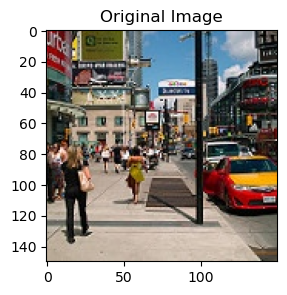

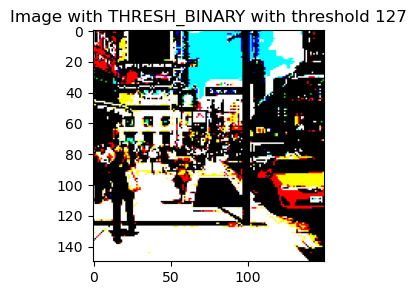

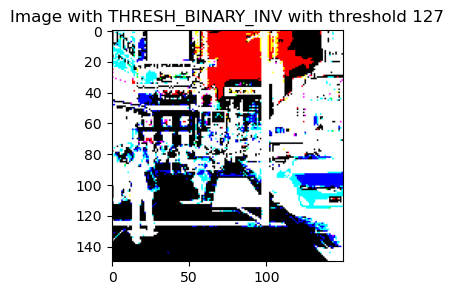

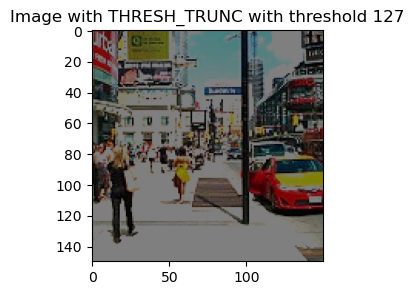

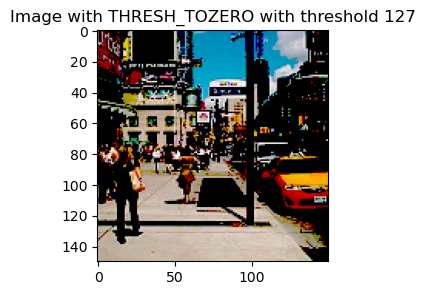

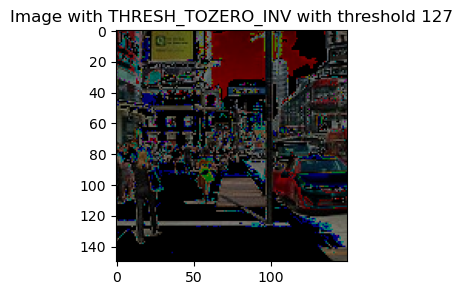

In [2]:
path = "images/121.jpg"
img = cv2.imread(path)
show_image(img , "Original Image", 3)

# use cv2.threshold(img, threshold, max_value,threshold_mechanism)
# the cv2.threshold() method required to set the hardcoded thresholdd and maximum value
ret,threshold_img1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #  means everything below 127 converted to 0 and above converted to maxvalue
show_image(threshold_img1 , "Image with THRESH_BINARY with threshold 127", 3)

ret,threshold_img2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) # means everything below 127 converted to 255 and above converted to 0
show_image(threshold_img2 , "Image with THRESH_BINARY_INV with threshold 127", 3)

ret,threshold_img3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) # values below 127 and remains same but values above 127 are convert to 127 also the max_value 255 is unused.
show_image(threshold_img3 , "Image with THRESH_TRUNC with threshold 127", 3)

ret,threshold_img4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) # values below 127 converted to 0 but values above 127 are remain same. 
show_image(threshold_img4 , "Image with THRESH_TOZERO with threshold 127", 3)

ret,threshold_img5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV) # values below 127 are unchanges but values above 127 converted to 0.
show_image(threshold_img5 , "Image with THRESH_TOZERO_INV with threshold 127", 3)


### Adaptive Thresholding
- it is a process where the algorithm decide the threshold value based on image to get exact binarization
- use cv2.adaptiveThreshold(img, max_value, threshold_algorithm, threshold_mechanism, block_size, value_to_subtract)
    1. for adaptiveThreshold you can use ADAPTIVE_THRESH_GAUSSIAN_C and ADAPTIVE_THRESH_MEAN_C as per use
    2. also you can use cv2.THRESH_BINARY + cv2.THRESH_OTSU with cv2.threshold() method 
- you have to play with these as per your use case

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


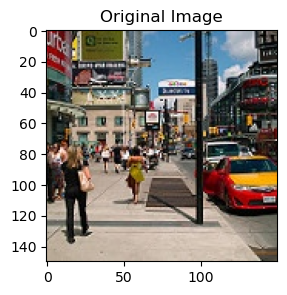

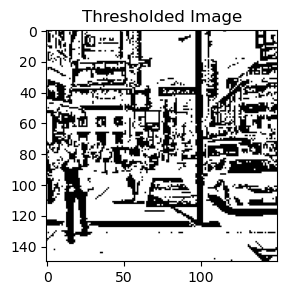

In [3]:
from skimage.filters import threshold_local 
# most optimal and adaptive method for binarization and thresholding
# use in document scanning

path = "images/121.jpg"
img = cv2.imread(path)
show_image(img , "Original Image", 3)

# first we have to fetch the value component of an image from the HSV color space
# then we apply the adaptive thresholding i.e threshold_local from skimage.filters for that 
# use threshold_local(value_hsv_space, block_size, offset, noise_removal_method)

v = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))[2]
t = threshold_local(v,25, offset=15, method = "gaussian")

# after findting the value and threshold we have to apply the threshold operation
thresh = (v > t).astype("uint8") * 255
show_image(thresh, "Thresholded Image", 3)


### Erosion, Dilation, Opening and Closing of Images
- Basically Erosion referes to removing the pixels from object boundary
- similarly, Dilation add the pixels to the boundary of an object
- Opening works in two phases, first it apply erosion on image and then apply dialation on image.
- similarly, Closing is opposite to opening, it first apply dialation and then apply erosion on image.

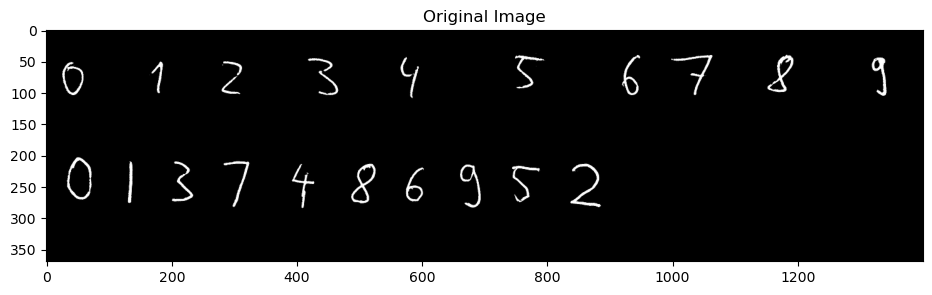

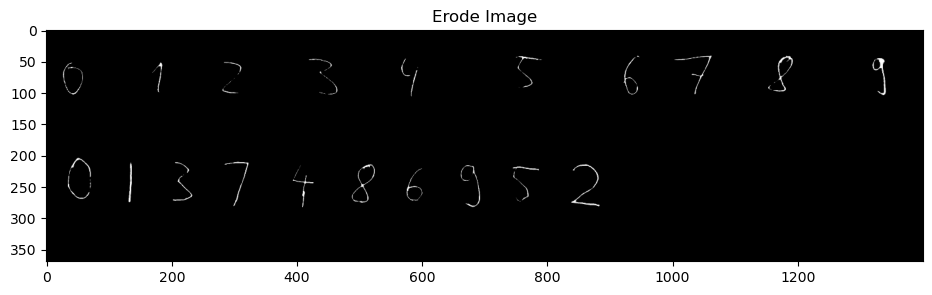

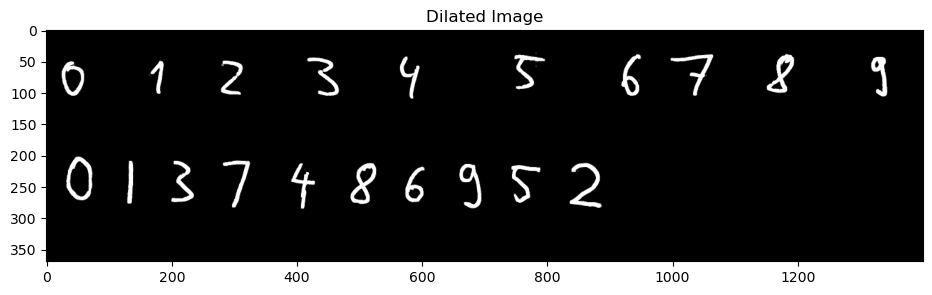

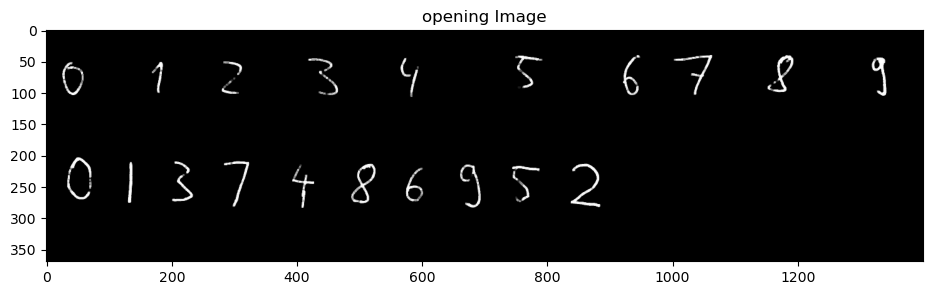

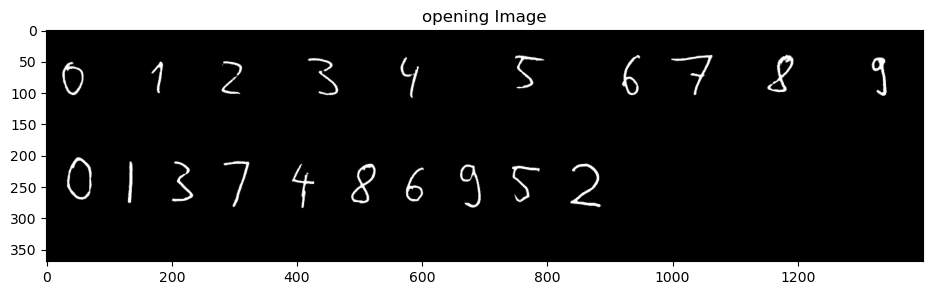

In [4]:
path = "images/handwritten_digits.png"
img = cv2.imread(path)
show_image(img, "Original Image", 3)

# specify the kernal to erode and diluate the image
kernal_3x3 = np.ones((3,3),np.uint8)

# use cv2.erode(img, erode_kernal_nxn, iterations = n) # iteration refers how many time the kernal will iterate on image
# higher the iteration higher the erosion 

erosion_img = cv2.erode(img, kernal_3x3, iterations = 1)
show_image(erosion_img, "Erode Image", 3)

# use cv2.dilate(img, dilate_kernal_nxn, iterations = n) to perform image dilation 
dilated_img = cv2.dilate(img, kernal_3x3, iterations = 1)
show_image(dilated_img, "Dilated Image", 3)

# both opening and closing is good for removing noise from image
# use cv2.morphologyEx(img, cv2.MORPH_OPEN / cv2.MORPH_CLOSE, kernal_nxn) 
opening_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernal_3x3)
show_image(opening_img, "opening Image", 3)

closing_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernal_3x3)
show_image(closing_img, "opening Image", 3)

### Edge Detection using OpenCV (Canny Edge Detection)

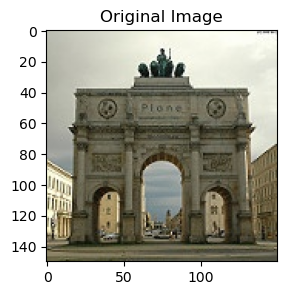

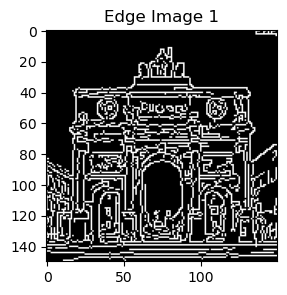

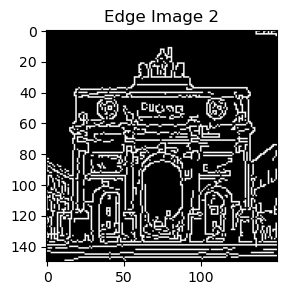

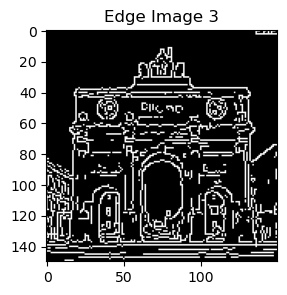

In [5]:
path = "images/103.jpg"
img = cv2.imread(path)
show_image(img, "Original Image", 3)

# use cv2.Canny(img, lower_th1, upper_th2, apprature(optional)) to detecte edged in the images
# Canny is a mathematical algorithm uses derivation to find the min and max value i.e edges.

# the higher the different between lower and upper threshold the more detailed edges you get
edge_img = cv2.Canny(img, 60, 200)
show_image(edge_img, "Edge Image 1", 3)

edge_img = cv2.Canny(img, 100, 200)
show_image(edge_img, "Edge Image 2", 3)

edge_img = cv2.Canny(img, 150, 200)
show_image(edge_img, "Edge Image 3", 3)


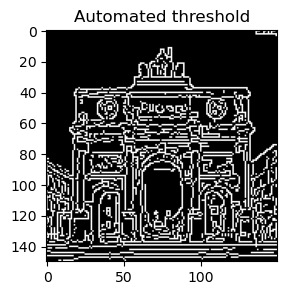

In [6]:
def autoCanny(image):
    # Finds optimal thresholds based on median image pixel intensity
    blurred_img = cv2.blur(image, ksize=(5,5))
    med_val = np.median(image) 
    lower = int(max(0, 0.66 * med_val))
    upper = int(min(255, 1.33 * med_val))
    edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
    return edges   


auto_canny = autoCanny(img)
show_image(auto_canny, "Automated threshold", 3)